In [ ]:
#group assignment 1
#group name: fintech
#group members: 
#   1. Egamberdiev Temurbek
#   2. Pulatov Jamshid
#   3. Ruzimurodov Abbos
#   4. Abdurayimov Jalol




import pandas as pd

# Load the dataset
df = pd.read_csv('https://www.stlouisfed.org/-/media/project/frbstl/stlouisfed/research/fred-md/monthly/current.csv?sc_lang=en&hash=80445D12401C59CF716410F3F7863B64')

# Clean the DataFrame by removing the row with transformation codes
df_cleaned = df.drop(index=0)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned['sasdate'] = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
df_cleaned

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-01-01,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9616,23.3868,22.2620,31.6664,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
1,1959-02-01,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3917,23.7024,22.4549,31.8987,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
2,1959-03-01,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7142,23.8459,22.5651,31.8987,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
3,1959-04-01,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.1981,24.1903,22.8957,32.4019,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
4,1959-05-01,2642.720,2486.4,15.622,2.853072e+05,18679.66354,23.5476,24.3911,23.1161,32.5567,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.00,12646.00,80.7315,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,2024-09-01,19993.464,16283.1,121.690,1.541305e+06,716388.00000,102.5873,100.4044,100.1100,102.0602,...,119.220,128.682,31.45,36.18,28.01,70.1,553347.06,934283.59,5368.5671,17.6597
789,2024-10-01,20067.376,16340.0,121.904,1.538666e+06,720393.00000,102.1219,99.6821,99.0178,101.4336,...,119.218,129.176,31.53,36.27,28.07,70.5,554951.25,938525.34,5407.2449,19.9478
790,2024-11-01,20111.246,16385.1,122.435,1.544822e+06,725079.00000,101.9736,99.5645,99.0025,101.0038,...,119.230,129.390,31.59,36.26,28.22,71.8,556075.09,941204.79,5382.5669,15.9822
791,2024-12-01,20136.069,16407.9,123.103,1.555153e+06,730300.00000,102.9833,100.2940,99.6550,101.3436,...,119.746,129.875,31.73,36.46,28.33,74.0,558854.68,946489.00,5370.9871,15.6997


In [7]:
# Extract transformation codes
transformation_codes = df.iloc[0, 1:].to_frame().reset_index()
transformation_codes.columns = ['Series', 'Transformation_Code']

import numpy as np

# Function to apply transformations based on the transformation code
def apply_transformation(series, code):
    if code == 1:
        # No transformation
        return series
    elif code == 2:
        # First difference
        return series.diff()
    elif code == 3:
        # Second difference
        return series.diff().diff()
    elif code == 4:
        # Log
        return np.log(series)
    elif code == 5:
        # First difference of log
        return np.log(series).diff()
    elif code == 6:
        # Second difference of log
        return np.log(series).diff().diff()
    elif code == 7:
        # Delta (x_t/x_{t-1} - 1)
        return series.pct_change()
    else:
        raise ValueError("Invalid transformation code")

# Applying the transformations to each column in df_cleaned based on transformation_codes
for series_name, code in transformation_codes.values:
    df_cleaned[series_name] = apply_transformation(df_cleaned[series_name].astype(float), float(code))


df_cleaned = df_cleaned[2:]
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1959-03-01,0.006457,0.007325,0.009404,-0.003374,0.008321,0.014300,0.006036,0.004896,0.000000,...,-0.001148,0.000292,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN
1,1959-04-01,0.006510,0.007029,-0.003622,0.019915,0.000616,0.021080,0.014339,0.014545,0.015652,...,0.001312,0.001760,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN
2,1959-05-01,0.005796,0.006618,0.012043,0.006839,0.007803,0.014954,0.008267,0.009580,0.004766,...,-0.001695,-0.001867,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN
3,1959-06-01,0.003068,0.003012,0.003642,-0.000097,0.009064,0.001137,0.007035,0.007125,-0.004766,...,0.003334,0.001946,-0.004619,0.003992,0.004796,NaN,0.009726,0.009007,-0.012252,NaN
4,1959-07-01,-0.000580,-0.000762,-0.003386,0.012155,-0.000330,-0.024237,0.001168,0.008251,0.013056,...,-0.001204,-0.000013,0.000000,-0.004040,-0.004796,NaN,-0.004631,-0.001000,0.029341,NaN


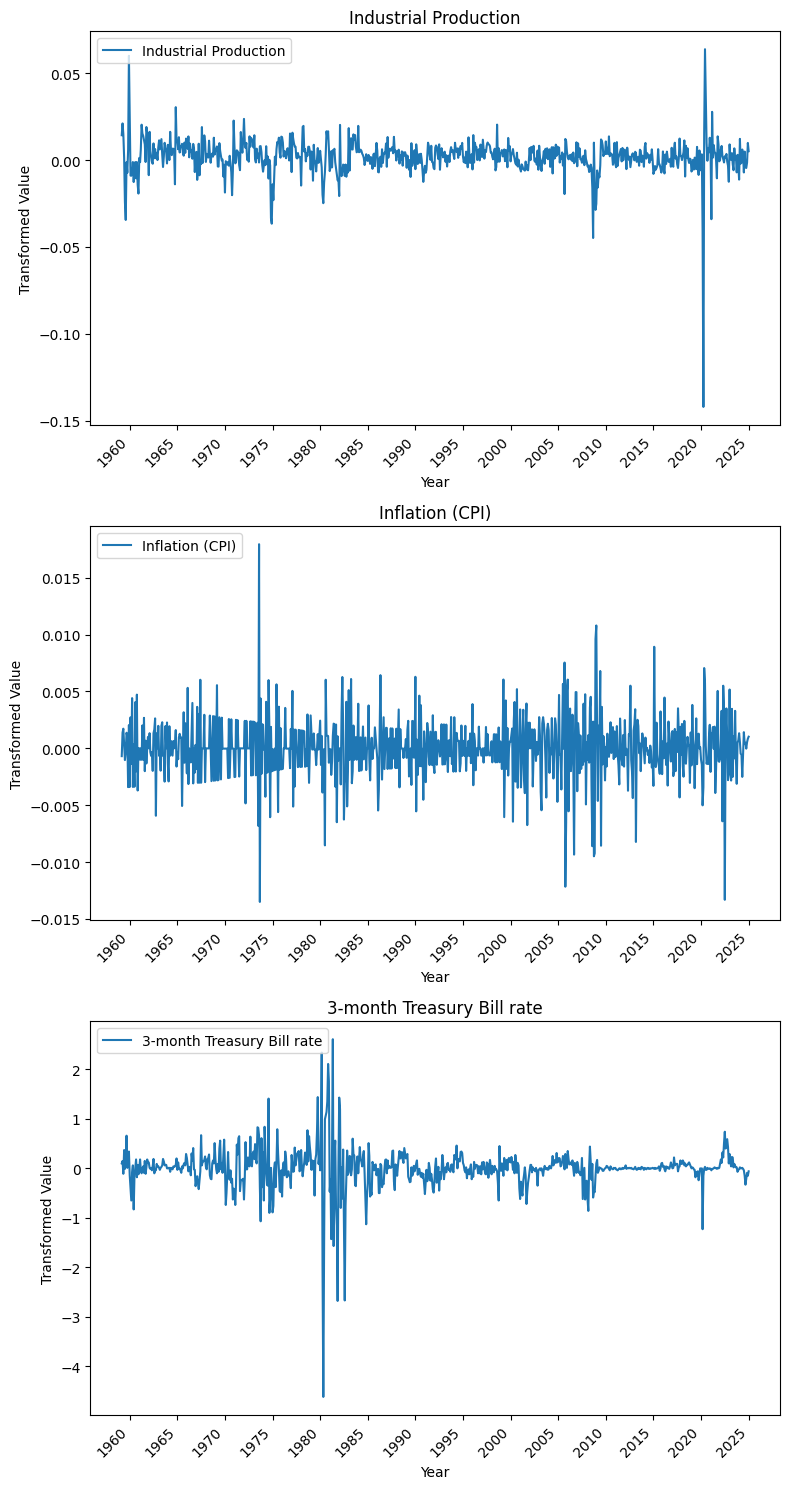

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

series_to_plot = ['INDPRO', 'CPIAUCSL', 'TB3MS']
series_names = ['Industrial Production',
                'Inflation (CPI)',
                '3-month Treasury Bill rate']


# Create a figure and a grid of subplots
fig, axs = plt.subplots(len(series_to_plot), 1, figsize=(8, 15))

# Iterate over the selected series and plot each one
for ax, series_name, plot_title in zip(axs, series_to_plot, series_names):
    if series_name in df_cleaned.columns:
        dates = pd.to_datetime(df_cleaned['sasdate'], format='%m/%d/%Y')
        ax.plot(dates, df_cleaned[series_name], label=plot_title)
        ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.set_title(plot_title)
        ax.set_xlabel('Year')
        ax.set_ylabel('Transformed Value')
        ax.legend(loc='upper left')
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    else:
        ax.set_visible(False)  # Hide plots for which the data is not available

plt.tight_layout()
plt.show()

In [9]:
Yraw = df_cleaned['INDPRO']
Xraw = df_cleaned[['CPIAUCSL', 'TB3MS']]

num_lags  = 4  ## this is p
num_leads = 1  ## this is h
X = pd.DataFrame()
## Add the lagged values of Y
col = 'INDPRO'
for lag in range(0,num_lags+1):
        # Shift each column in the DataFrame and name it with a lag suffix
        X[f'{col}_lag{lag}'] = Yraw.shift(lag)

for col in Xraw.columns:
    for lag in range(0,num_lags+1):
        # Shift each column in the DataFrame and name it with a lag suffix
        X[f'{col}_lag{lag}'] = Xraw[col].shift(lag)
## Add a column on ones (for the intercept)
X.insert(0, 'Ones', np.ones(len(X)))


## X is now a DataFrame
X.head()

,Ones,INDPRO_lag0,INDPRO_lag1,INDPRO_lag2,INDPRO_lag3,INDPRO_lag4,CPIAUCSL_lag0,CPIAUCSL_lag1,CPIAUCSL_lag2,CPIAUCSL_lag3,CPIAUCSL_lag4,TB3MS_lag0,TB3MS_lag1,TB3MS_lag2,TB3MS_lag3,TB3MS_lag4
0,1.0,0.014300,NaN,NaN,NaN,NaN,-0.000690,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,NaN
1,1.0,0.021080,0.014300,NaN,NaN,NaN,0.001380,-0.000690,NaN,NaN,NaN,0.15,0.10,NaN,NaN,NaN
2,1.0,0.014954,0.021080,0.014300,NaN,NaN,0.001723,0.001380,-0.000690,NaN,NaN,-0.11,0.15,0.10,NaN,NaN
3,1.0,0.001137,0.014954,0.021080,0.01430,NaN,0.000339,0.001723,0.001380,-0.00069,NaN,0.37,-0.11,0.15,0.10,NaN
4,1.0,-0.024237,0.001137,0.014954,0.02108,0.0143,-0.001034,0.000339,0.001723,0.00138,-0.00069,-0.01,0.37,-0.11,0.15,0.1


In [10]:
y = Yraw.shift(-num_leads)
y

0      0.021080
1      0.014954
2      0.001137
3     -0.024237
4     -0.034464
         ...   
786   -0.004547
787   -0.001453
788    0.009853
789    0.005111
790         NaN
Name: INDPRO, Length: 791, dtype: float64

In [11]:
## Save last row of X (converted to numpy)
X_T = X.iloc[-1:].values
## Subset getting only rows of X and y from p+1 to h-1
## and convert to numpy array
y = y.iloc[num_lags:-num_leads].values
X = X.iloc[num_lags:-num_leads].values
X_T

array([[ 1.00000000e+00,  5.11104809e-03,  9.85288291e-03,
        -1.45324151e-03, -4.54694564e-03, -4.20511799e-03,
         1.01839974e-03,  8.39506878e-04,  5.38574156e-04,
        -2.74117085e-05,  4.89182561e-04, -6.00000000e-02,
        -1.50000000e-01, -9.00000000e-02, -2.10000000e-01,
        -3.30000000e-01]])